In this project, I utilize the NBA API to analyze the performance of the Golden State Warriors against the Toronto Raptors. We will extract the games between the two teams and calculate the points difference for each game. Positive values will indicate a Golden State Warriors win, while negative values will indicate a loss.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
!pip install nba_api

Defaulting to user installation because normal site-packages is not writeable


In [47]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

In [48]:
nba_teams = teams.get_teams()

In [49]:
df_teams=pd.DataFrame(nba_teams)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [50]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [51]:
id_warriors=df_warriors[['id']].values[0][0]
id_warriors

1610612744

In [52]:
from nba_api.stats.endpoints import leaguegamefinder

In [53]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

In [ ]:
gamefinder.get_json()

In [55]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22024,1610612744,GSW,Golden State Warriors,0022400885,2025-03-04,GSW @ NYK,W,241,114,...,0.789,9.0,35.0,44.0,30,7,7,11,14,12.0
1,22024,1610612744,GSW,Golden State Warriors,0022400875,2025-03-03,GSW @ CHA,W,239,119,...,0.875,12.0,42.0,54.0,33,10,4,8,23,18.0
2,22024,1610612744,GSW,Golden State Warriors,0022400864,2025-03-01,GSW @ PHI,L,239,119,...,0.789,18.0,31.0,49.0,33,7,4,15,19,-7.0
3,22024,1610612744,GSW,Golden State Warriors,0022400845,2025-02-27,GSW @ ORL,W,240,121,...,0.882,11.0,27.0,38.0,26,8,7,12,18,6.0
4,22024,1610612744,GSW,Golden State Warriors,0022400834,2025-02-25,GSW vs. CHA,W,241,128,...,0.833,16.0,35.0,51.0,40,16,5,11,20,36.0


In [56]:
games_gsw_tor = games[(games['MATCHUP'] == 'GSW vs. TOR') | (games['MATCHUP'] == 'GSW @ TOR')]
print(games_gsw_tor[['GAME_ID', 'GAME_DATE', 'MATCHUP', 'PTS', 'PLUS_MINUS']])

         GAME_ID   GAME_DATE      MATCHUP  PTS  PLUS_MINUS
23    0022400550  2025-01-13    GSW @ TOR  101        -3.0
100   0022300860  2024-03-01    GSW @ TOR  120        15.0
123   0022300504  2024-01-07  GSW vs. TOR  118       -15.0
164   1522300062  2023-07-15    GSW @ TOR  101         1.2
217   0022200740  2023-01-27  GSW vs. TOR  129        12.0
...          ...         ...          ...  ...         ...
2454  0029900193  1999-11-27  GSW vs. TOR   88       -18.0
2534  0029700925  1998-03-15  GSW vs. TOR   98        -2.0
2595  0029700034  1997-11-04    GSW @ TOR   86       -18.0
2616  0029600927  1997-03-15  GSW vs. TOR  106         4.0
2659  0029600277  1996-12-10    GSW @ TOR  101        10.0

[66 rows x 5 columns]


In [57]:
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']

In [58]:
games_home['PLUS_MINUS'].mean()

3.375

In [59]:
games_away['PLUS_MINUS'].mean()

-1.7588235294117647

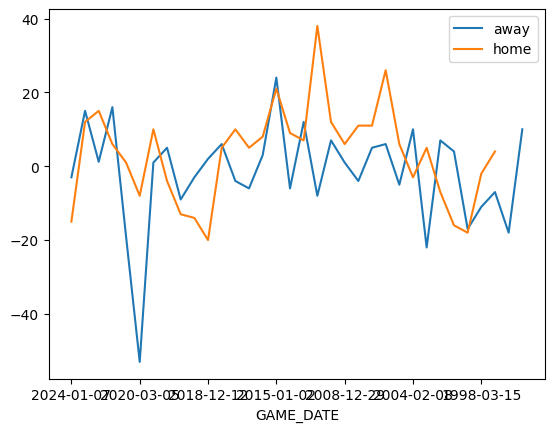

In [60]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

In [61]:
games_home['PTS'].mean()
games_away['PTS'].mean()

103.17647058823529

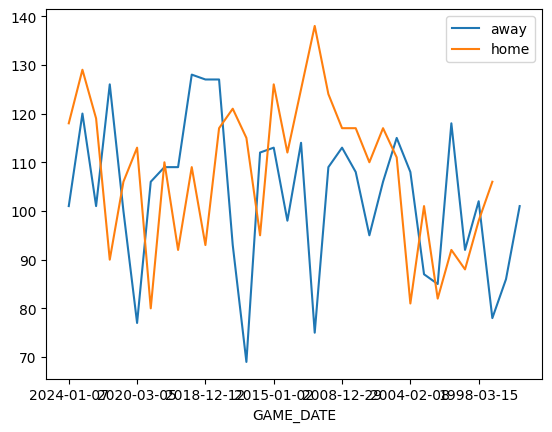

In [62]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PTS', ax=ax)
games_home.plot(x='GAME_DATE',y='PTS', ax=ax)
ax.legend(["away", "home"])
plt.show()